In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier

In [2]:
wine = pd.read_csv('winequality-red[1].csv', sep=';')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
wine.value_counts().head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  density  pH    sulphates  alcohol  quality
7.5            0.510             0.02         1.7             0.084      13.0                 31.0                  0.99538  3.36  0.54       10.5     6          4
6.7            0.460             0.24         1.7             0.077      18.0                 34.0                  0.99480  3.39  0.60       10.6     6          4
7.2            0.360             0.46         2.1             0.074      24.0                 44.0                  0.99534  3.40  0.85       11.0     7          4
               0.695             0.13         2.0             0.076      12.0                 20.0                  0.99546  3.29  0.54       10.1     5          4
8.3            0.650             0.10         2.9             0.089      17.0                 40.0                  0.99803  3.29  0.55       9.5      5          3
dtype: int64

In [7]:
bins = (2,5,8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins= bins, labels=group_names)

In [8]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


<AxesSubplot:xlabel='quality', ylabel='count'>

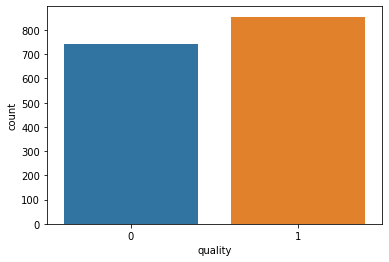

In [9]:
from sklearn.preprocessing import LabelEncoder
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
#wine['quality'].value_counts()
import seaborn as sns
sns.countplot(wine['quality'])

In [10]:
X=wine.iloc[:, :-1].values
y= wine['quality'].values
print(X[:5])
print(y[:5])

[[7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]
 [7.800e+00 8.800e-01 0.000e+00 2.600e+00 9.800e-02 2.500e+01 6.700e+01
  9.968e-01 3.200e+00 6.800e-01 9.800e+00]
 [7.800e+00 7.600e-01 4.000e-02 2.300e+00 9.200e-02 1.500e+01 5.400e+01
  9.970e-01 3.260e+00 6.500e-01 9.800e+00]
 [1.120e+01 2.800e-01 5.600e-01 1.900e+00 7.500e-02 1.700e+01 6.000e+01
  9.980e-01 3.160e+00 5.800e-01 9.800e+00]
 [7.400e+00 7.000e-01 0.000e+00 1.900e+00 7.600e-02 1.100e+01 3.400e+01
  9.978e-01 3.510e+00 5.600e-01 9.400e+00]]
[0 0 0 1 0]


In [11]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)

In [12]:
#Randomforest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import recall_score, f1_score, precision_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)


print(confusion_matrix(y_test, pred_rfc))
print()
print(classification_report(y_test, pred_rfc))

from sklearn.metrics import accuracy_score
print('accuracy_score:', accuracy_score(y_test, pred_rfc))

[[123  23]
 [ 32 142]]

              precision    recall  f1-score   support

           0       0.79      0.84      0.82       146
           1       0.86      0.82      0.84       174

    accuracy                           0.83       320
   macro avg       0.83      0.83      0.83       320
weighted avg       0.83      0.83      0.83       320

accuracy_score: 0.828125


In [13]:
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.05,random_state= 12)
rf_gini = RandomForestClassifier(n_estimators= 200, criterion='gini')
rf_entropy = RandomForestClassifier(n_estimators= 200, criterion='entropy')

list_option = {'RondomForest (gini)': rf_gini, 'RondomForest (entropy)': rf_entropy}
for i in list_option:
    model= cross_val_score(list_option[i],X_train, y_train, cv=5)
    model= model.mean()
    print(i, " score: ", round(model*100, 2))

RondomForest (gini)  score:  82.16
RondomForest (entropy)  score:  82.55


In [14]:
heart_faliure_data = pd.read_csv('heart_failure_survivle - heart_failure_survivle.csv', 
                                 low_memory = False, 
                                 skipinitialspace = True, 
                                 float_precision = 'round_trip')

heart_faliure_data.head()

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [15]:
heart_faliure_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,299.0,149.000000,86.458082,0.0,74.5,149.0,223.5,298.0
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0


In [16]:
X = heart_faliure_data[['ejection_fraction', 'serum_creatinine', 'age']]
y = heart_faliure_data[['DEATH_EVENT']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.90, test_size = 0.10, random_state = 109)

In [17]:
RF = RandomForestClassifier(n_estimators=20,)
DT= DecisionTreeClassifier(criterion='gini')
ABC_DT = AdaBoostClassifier(DT, n_estimators=20, learning_rate= 1)
ABC_RF = AdaBoostClassifier(RF, n_estimators=20, learning_rate= 1)

In [18]:
ABC_DT.fit(X_train,y_train)
print('AdaBoost with DecisionTree with train set : ', ABC_DT.score(X_train,y_train))
print('AdaBoost with DecisionTree with test set : ', ABC_DT.score(X_test,y_test))
print('*********************************************************')
ABC_RF.fit(X_train,y_train)
print('AdaBoost with RandomForest with train set : ',ABC_RF.score(X_train,y_train))
print('AdaBoost with RandomForest with test set : ',ABC_RF.score(X_test,y_test))

AdaBoost with DecisionTree with train set :  0.9888475836431226
AdaBoost with DecisionTree with test set :  0.6333333333333333
*********************************************************
AdaBoost with RandomForest with train set :  0.9888475836431226
AdaBoost with RandomForest with test set :  0.7333333333333333


In [19]:
y_pred= ABC_RF.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 0])

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
Data_df= pd.DataFrame()
Data_df['Actual_value'] = y_test
Data_df['Predicted_value'] = y_pred
print(Data_df.head(10))
print('\nconfusion_matrix : \n',confusion_matrix(y_test, y_pred))
print('classification_report\n : ',classification_report(y_test, y_pred))

     Actual_value  Predicted_value
25              1                1
187             1                0
83              0                1
204             0                0
54              1                0
55              1                1
74              1                1
128             0                0
145             0                0
28              1                0

confusion_matrix : 
 [[15  2]
 [ 6  7]]
classification_report
 :                precision    recall  f1-score   support

           0       0.71      0.88      0.79        17
           1       0.78      0.54      0.64        13

    accuracy                           0.73        30
   macro avg       0.75      0.71      0.71        30
weighted avg       0.74      0.73      0.72        30



In [21]:
#AdaBoost Classifier
df= pd.read_csv('HealthInsurance.csv', index_col=0)
df.head()

,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
1,yes,31,no,male,yes,yes,yes,4,south,cauc,bachelor
2,yes,31,no,female,yes,yes,no,4,south,cauc,highschool
3,yes,54,no,male,yes,yes,no,5,west,cauc,ged
4,yes,27,no,male,yes,no,no,5,west,cauc,highschool
5,yes,39,no,male,yes,yes,no,5,west,cauc,none


In [22]:
from sklearn.preprocessing import LabelEncoder
labels_ = LabelEncoder()
df= df.apply(LabelEncoder().fit_transform)
df.head()

,health,age,limit,gender,insurance,married,selfemp,family,region,ethnicity,education
1,1,13,0,1,1,1,1,3,2,1,0
2,1,13,0,0,1,1,0,3,2,1,2
3,1,36,0,1,1,1,0,4,3,1,1
4,1,9,0,1,1,0,0,4,3,1,2
5,1,21,0,1,1,1,0,4,3,1,4


In [23]:
X= df.drop(columns=['insurance'])
y= df['insurance']


In [24]:
sc= StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)
Des_tre = DecisionTreeClassifier(criterion='entropy', random_state=1)
Des_tree=Des_tre.fit(X_train, y_train)
print('Training Score: ', round(Des_tree.score(X_train, y_train), 3),
      '\nTest Score: ',round(Des_tree.score(X_test, y_test),3))


Training Score:  0.968 
Test Score:  0.72


In [25]:
ABC = AdaBoostClassifier(base_estimator=Des_tre,
                                   n_estimators=100,
                                   learning_rate=0.0005,
                                   algorithm = 'SAMME',
                                   random_state=1)
ABC.fit(X_train, y_train)
print('Training Score: ', round(ABC.score(X_train, y_train), 3),
      '\nTest Score: ',round(ABC.score(X_test, y_test),3))
print(ABC.base_estimator)

Training Score:  0.968 
Test Score:  0.735
DecisionTreeClassifier(criterion='entropy', random_state=1)


In [26]:
from sklearn.model_selection import GridSearchCV
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2]
             }
Dec_Tree = DecisionTreeClassifier(max_features = "auto", random_state = 11)
ABC = AdaBoostClassifier(base_estimator = Dec_Tree, n_estimators=100,
                                   learning_rate=0.0005,
                                   algorithm = 'SAMME',
                                   random_state=12)
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, cv=5).fit(X_train, y_train)

print('Training Score: ', round(grid_search_ABC.score(X_train, y_train), 3),
      '\nTest Score: ',round(grid_search_ABC.score(X_test, y_test),3))

Training Score:  0.968 
Test Score:  0.728


In [27]:
grid_search_ABC.best_params_

{'base_estimator__criterion': 'entropy',
 'base_estimator__splitter': 'best',
 'n_estimators': 1}

In [28]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [29]:
#XGBoost Classifier
data= pd.read_csv('Attrition.csv', index_col=0)
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [30]:
data.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)  
data.head()

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,...,3,1,0,8,0,1,6,4,0,5
49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,...,4,4,1,10,3,3,10,7,1,7
37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,...,3,2,0,7,3,3,0,0,0,0
33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,...,3,3,0,8,3,3,8,7,3,0
27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data= data.apply(le.fit_transform)
data

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,,,,,,,,,,,,,,,,,,,,,
41,1,2,624,2,0,1,1,0,1,0,...,0,0,0,8,0,0,6,4,0,5
49,0,1,113,1,7,0,1,1,2,1,...,1,3,1,10,3,2,10,7,1,7
37,1,2,805,1,1,1,4,2,3,1,...,0,1,0,7,3,2,0,0,0,0
33,0,1,820,1,2,3,1,3,3,0,...,0,2,0,8,3,2,8,7,3,0
27,0,2,312,1,1,0,3,4,0,1,...,0,3,1,6,3,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,0,1,494,1,22,1,3,1465,2,1,...,0,2,1,17,3,2,5,2,0,3
39,0,2,327,1,5,0,3,1466,3,1,...,0,0,1,9,5,2,7,7,1,7
27,0,2,39,1,3,2,1,1467,1,1,...,1,1,1,6,0,2,6,2,0,3


In [32]:
data= pd.get_dummies(data, columns=['BusinessTravel','Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus',], drop_first=True,)
data.head()

,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_1,JobRole_2,JobRole_3,JobRole_4,JobRole_5,JobRole_6,JobRole_7,JobRole_8,MaritalStatus_1,MaritalStatus_2
Age,,,,,,,,,,,,,,,,,,,,,
41,1,624,0,1,0,1,64,2,1,3,...,0,0,0,0,0,0,1,0,0,1
49,0,113,7,0,1,2,31,1,1,1,...,0,0,0,0,0,1,0,0,1,0
37,1,805,1,1,2,3,62,1,0,2,...,0,1,0,0,0,0,0,0,0,1
33,0,820,2,3,3,3,26,2,0,2,...,0,0,0,0,0,1,0,0,1,0
27,0,312,1,0,4,0,10,2,0,1,...,0,1,0,0,0,0,0,0,1,0


In [33]:
X = data.loc[:, data.columns != 'Attrition']
y = data['Attrition']
y.unique

<bound method Series.unique of Age
41    1
49    0
37    1
33    0
27    0
     ..
36    0
39    0
27    0
49    0
34    0
Name: Attrition, Length: 1470, dtype: int64>

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test= train_test_split(X,y, test_size=0.25, random_state=False,)

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

In [36]:
DT = DecisionTreeClassifier(criterion='gini',)
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [37]:
DT_train_result = DT.score(X_train, y_train)
DT_result= DT.score(X_test, y_test)
print('Decision Tree_train_result : ', DT_train_result)
print('Decision Tree_test_result : ', DT_result)
DT.predict(X_test)

Decision Tree_train_result :  1.0
Decision Tree_test_result :  0.7989130434782609


array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

In [38]:
RF = RandomForestClassifier(n_estimators=20,)
RF.fit(X_train, y_train)
print('RF_train_result : ', RF.score(X_train, y_train))
print('RF_test_result : ', RF.score(X_test, y_test))

RF_train_result :  0.9936479128856625
RF_test_result :  0.8641304347826086


In [39]:
import xgboost as xgb
from xgboost import XGBClassifier
XGB= xgb.XGBClassifier()
XGB.fit(X_train,y_train)
print('XGB.score on train set : ', XGB.score(X_train,y_train))
print('XGB.score on test set : ', XGB.score(X_test,y_test))

XGB.score on train set :  1.0
XGB.score on test set :  0.8586956521739131


In [40]:
print('Actual_values : ',y_test[:35].values)   # '1': 'Yes', '0': 'NO'
print('DT_Attrition :  ', DT.predict(X_test)[:35])
print('RF_Attrition  : ', RF.predict(X_test)[:35])
print('XGB_Attrition : ', XGB.predict(X_test)[:35])

Actual_values :  [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
DT_Attrition :   [0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0]
RF_Attrition  :  [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
XGB_Attrition :  [0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [41]:
#Voting Classifier
pipeline_ET=Pipeline([('scalar3',StandardScaler()),('ET_classifier',ExtraTreeClassifier())])
pipeline_BG=Pipeline([('scalar3',StandardScaler()),('BG_classifier',BaggingClassifier())])
pipeline_RF=Pipeline([('scalar3',StandardScaler()),('rf_classifier',RandomForestClassifier())])
pipeline_GBC=Pipeline([('scalar3',StandardScaler()),('GBC_DT_classifier',GradientBoostingClassifier())])
pipeline_ABC=Pipeline([('scalar3',StandardScaler()),('ABC_DT_classifier',AdaBoostClassifier())])
pipeline_XGB=Pipeline([('scalar3',StandardScaler()),('XGB_classifier',XGBClassifier())])
pipelines = [pipeline_ET, pipeline_BG, pipeline_RF, pipeline_GBC, pipeline_ABC, pipeline_XGB]

In [42]:
from sklearn.ensemble import VotingClassifier
# voting= 'hard'
print('Hard voting classifier classifies input data based on the mode of all the predictions made by different classifiers.')
Vot_CH = VotingClassifier(
    estimators=[('ET', pipeline_ET), ('BG', pipeline_BG), ('rf', pipeline_RF),
                ('GBC', pipeline_GBC), ('ABC', pipeline_ABC), ('XGB', pipeline_XGB),], voting='hard')

Vot_CH.fit(X_train,y_train)
print('VotingClassifier Score with voting="hard" with train set : ', Vot_CH.score(X_train,y_train)) 
print('VotingClassifier Score with voting="hard" with test set : ', Vot_CH.score(X_test,y_test))    

Hard voting classifier classifies input data based on the mode of all the predictions made by different classifiers.
VotingClassifier Score with voting="hard" with train set :  0.9909255898366606
VotingClassifier Score with voting="hard" with test set :  0.8722826086956522


In [43]:
# voting= 'Soft'
print('Soft voting classifier classifies input data based on the probabilities of all the predictions made by different classifiers.')
Vot_CS = VotingClassifier(
    estimators=[('ET', pipeline_ET), ('BG', pipeline_BG), ('rf', pipeline_RF),
                ('GBC', pipeline_GBC), ('ABC', pipeline_ABC), ('XGB', pipeline_XGB),], voting='soft', )

Vot_CS.fit(X_train,y_train)
print('VotingClassifier Score with voting="soft" with train set : ', Vot_CS.score(X_train,y_train))
print('VotingClassifier Score with voting="soft" with test set : ', Vot_CS.score(X_test,y_test))

Soft voting classifier classifies input data based on the probabilities of all the predictions made by different classifiers.
VotingClassifier Score with voting="soft" with train set :  1.0
VotingClassifier Score with voting="soft" with test set :  0.8804347826086957
